#                                       Edoardo Antonaci 1234431

## Exercise 1

### • a well established and diffused method for detecting a disease in blood fails to detect the presence 
### of disease in 15% of the patients that actually have the disease

### • A young UniPD startUp has developed an innovative method of screening. During the qualification 
### phase, a random sample of n = 75 patients known to have the disease is screened using the new
### method.

### (a) what is the probability distribution of y, the number of times the new method fails to detect the disease ?

###   <span style="color:blue"> without informations about how the new method works ,we suppose a Beta(1,1) distribution. </span>

### (b) on the n = 75 patients sample, the new method fails to detect the disease in y = 6 cases. What is the frequentist estimator of the failure probability of the new method ?

###   <span style="color:blue">For frequentist approach an *unbiased* estimator is  <font size="5">$\frac{y}{n}$</span> <span style="color:blue"> =0.08 </span>

### (c) setup a bayesian computation of the posterior probability, assuming a beta distribution with mean value 0.15 and standard deviation 0.14. Plot the posterior distribution for y, and mark on the plot the mean value and variance

In [1]:
bayesian<-function(x,mean,std,par){
    var<-std**2
    
    
    alpha<-mean*(-mean**2+mean-var)/var
    
    beta<-alpha*(1/mean-1)
    
    if(par==0){return(dbeta(x, alpha , beta) )}else{return(c(alpha,beta) )}
    
    }

mean_var<-function(alpha,beta){
    
    mean<-alpha/(alpha+beta)
    
    var<-alpha*beta/((alpha+beta)^2*(alpha+beta+1))

    return(c(mean,var) )
}

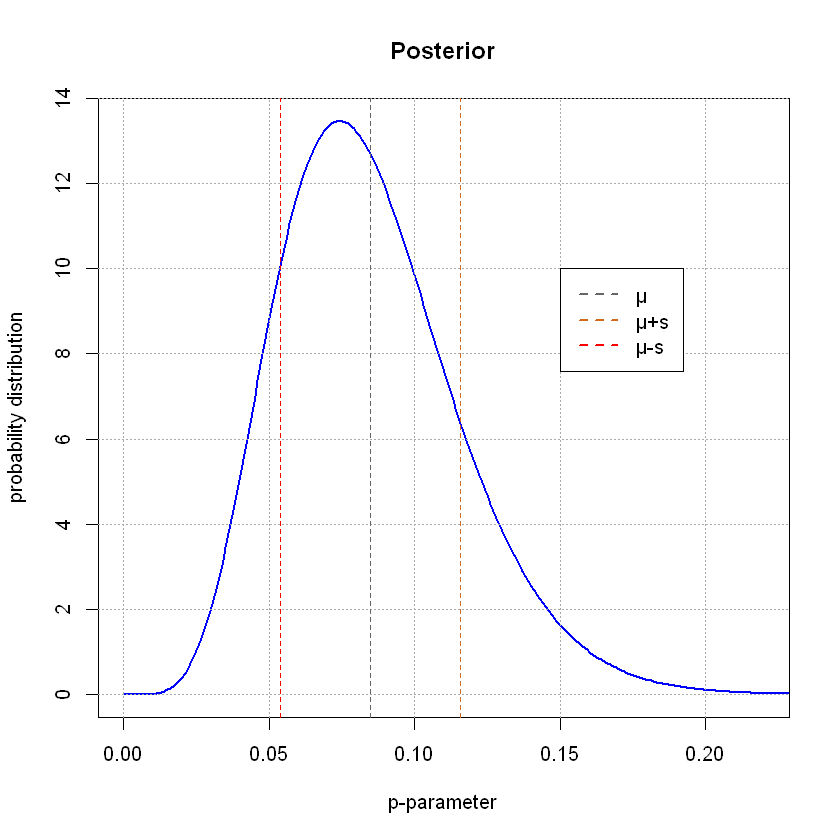

In [2]:
y<-6
n<-75
p<-y/n


x <- seq(0,1, length = 1e3)
interval_width<-1/(length(x)-1)

alpha_prior<-bayesian(mean=0.15,std=0.14,par=1)[1]
beta_prior<-bayesian(mean=0.15,std=0.14,par=1)[2]

alpha_posterior<-alpha_prior+y

beta_posterior<-beta_prior+n-y

posterior<-dbeta(x=x,alpha_posterior,beta_posterior)

mean_posterior<-mean_var(alpha_posterior,beta_posterior)[1]

var_posterior<-mean_var(alpha_posterior,beta_posterior)[2]

plot(x,posterior/sum(posterior*interval_width),col="blue",xlim=c(0,0.22),type="l",lwd=2,
    ylab="probability distribution",xlab="p-parameter",main="Posterior")
grid(nx = NULL, ny = NULL, col = "darkgray", lty = "dotted")
abline(v=mean_posterior, col="gray40", lty=2)
abline(v=mean_posterior+sqrt(var_posterior), col="chocolate", lty=2)
abline(v=mean_posterior-sqrt(var_posterior), col="red", lty=2)
legend(0.15,10, c("µ", "µ+s", "µ-s"), 
       col=c("gray40","chocolate","red"), 
       lty= c("dashed","dashed","dashed"),
       lwd = c(2,2,2) )


### (d) Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in ill patients is greater or equal than 15%, the new test is no better that the traditional method. Test the sample at a 5% level of significance in the Bayesian way.

In [3]:
if(pbeta(0.15,alpha_posterior,beta_posterior,lower.tail=FALSE)<0.05){
    cat("Hypothesis test can be rejected")}else{
    cat("Hypothesis test cannot be rejected")}

Hypothesis test can be rejected

In [19]:
?pbeta

###  <span style="color:blue"> Bayesian way : the new test works better than traditional one </span>

### (e) Perform the same hypothesis test in the classical frequentist way.

In [4]:
bin_test<-binom.test(x=6, n=75, p = 0.15,
           alternative = "less",  #alternative hypothesis : the test works better than traditional one
           conf.level = 0.95)

if(bin_test$p.value<0.05){
    cat("Hypothesis test can be rejected")}else{
    cat("Hypothesis test cannot be rejected")}

bin_test

Hypothesis test cannot be rejected


	Exact binomial test

data:  6 and 75
number of successes = 6, number of trials = 75, p-value = 0.05435
alternative hypothesis: true probability of success is less than 0.15
95 percent confidence interval:
 0.0000000 0.1517971
sample estimates:
probability of success 
                  0.08 


###  <span style="color:blue"> Frequentist way : the new test doesn't work better than traditional one </span>

## Exercise 2

### • Ladislaus Josephovich Bortkiewicz was a Russian economist and statistician. He noted that the Poisson distribution can be very useful in applied statistics when describing low-frequency events in a large population. In a famous example he showed that the number of deaths by horse kick among the Prussian army follows the Poisson distribution

### • Considering the following to sets of observations taken over a fixed large time interval in two different corps:


### y death soldiers 0 1 2 3 4   [≥ 5]
### n1 observations 109 65 22 3 1 0
### n2 observations 144 91 32 11 2 0


### (a) assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.

In [5]:
graphs<-function(lambda,interval_width,par){

    alpha<-sum(0*(109+144)+1*(65+91)+2*(22+32)+3*(3+11)+4*(1+2))+par
    beta<-sum((109+144)+(65+91)+(22+32)+(3+11)+(1+2))   


    posterior<-dgamma(lambda,shape=alpha,scale=1/beta)   

    mean_posterior<-alpha*1/beta
    median_posterior<-qgamma(0.50,shape=alpha,scale=1/beta)
    variance_posterior<-alpha*1/beta^2

    lower_bound<-qgamma(0.025,shape=alpha,scale=1/beta)

    upper_bound<-qgamma(0.975,shape=alpha,scale=1/beta)

    cat("The mean value is",mean_posterior,"\n")
    cat("The median value is",median_posterior,"\n")
    cat("The variance value is",variance_posterior,"\n")
    cat(" The 95% credibility intervall is [",lower_bound,",",upper_bound,"]")

    if(par==1){
         plot(lambda,posterior/sum(posterior*interval_width),col="blue",xlim=c(0.4,0.9),type="l",xlab="Lambda",
             ylab="probability function",main="Using Uniform Prior ")
        
        grid(nx = NULL, ny = NULL, col = "darkgray", lty = "dotted")
        abline(v=mean_posterior, col="gray40", lty=2)
        abline(v=mean_posterior+sqrt(var_posterior), col="chocolate", lty=2)
        abline(v=mean_posterior-sqrt(var_posterior), col="red", lty=2)
        legend(0.8,8, c("µ", "µ+s", "µ-s"), 
           col=c("gray40","chocolate","red"), 
           lty= c("dashed","dashed","dashed"),
           lwd = c(2,2,2) )
                }
    else if(par==1/2){
         plot(lambda,posterior/sum(posterior*interval_width),col="blue",
                      type="l",xlab="Lambda",ylab="probability function",main="Using Jeffrey Prior ")
         grid(nx = NULL, ny = NULL, col = "darkgray", lty = "dotted")
         abline(v=mean_posterior, col="gray40", lty=2)
         abline(v=mean_posterior+sqrt(var_posterior), col="chocolate", lty=2)
         abline(v=mean_posterior-sqrt(var_posterior), col="red", lty=2)
        legend(0.8,15, c("µ", "µ+s", "µ-s"), 
           col=c("gray40","chocolate","red"), 
           lty= c("dashed","dashed","dashed"),
           lwd = c(2,2,2) )
    }
    
    }

The mean value is 0.6645833 
The median value is 0.663889 
The variance value is 0.001384549 
 The 95% credibility intervall is [ 0.5936468 , 0.7394654 ]

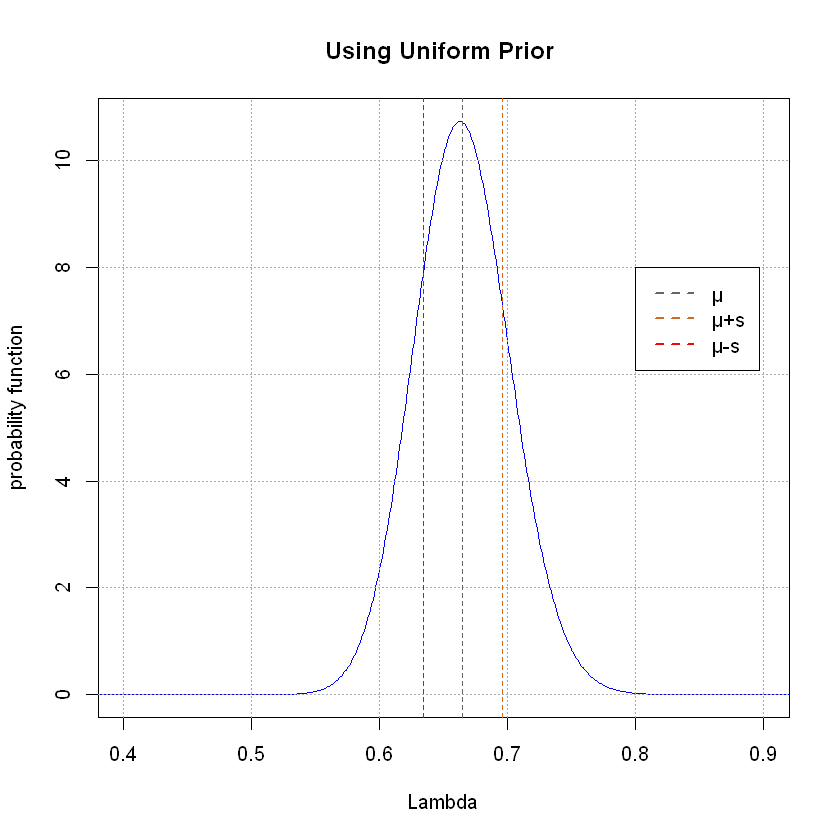

In [6]:
unif_lambda<-seq(0,1,length=1e3) 
interval_width<-1/(length(unif_lambda)-1)
graphs(unif_lambda,interval_width,par=1)

### (b) assuming now a Jeffreys’ prior,
### g(λ) ∝ 1/√λ , with λ > 0
### compute and plot the posterior distribution for λ, the death rate over the measurement time.
### Determine the posterior mean, median and variance, and compute the 95% credibility interval.


The mean value is 0.6635417 
The median value is 0.6628474 
The variance value is 0.001382378 
 The 95% credibility intervall is [ 0.5926624 , 0.7383665 ]

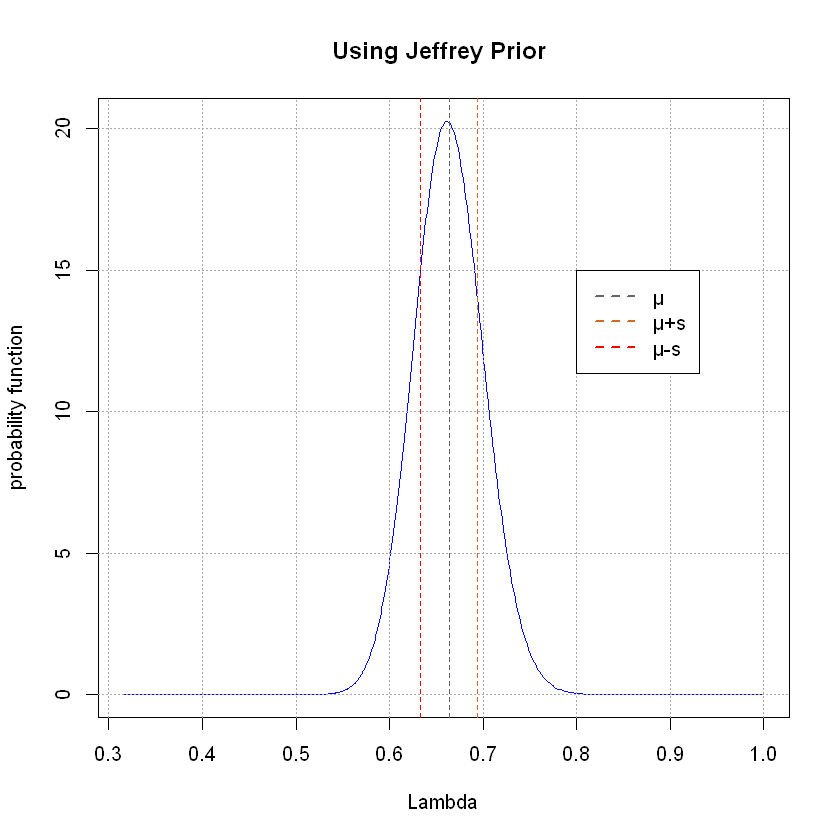

In [7]:
jeffrey_lambda<-1/sqrt(seq(10,1,length=1e3) )

interval_width<-(max(jeffrey_lambda)-min(jeffrey_lambda) )/(length(jeffrey_lambda)-1)
graphs(jeffrey_lambda,interval_width,par=1/2)

## Exercise 3

###  - A study on water quality of streams, a high level of bacter X was defined as a level greater than 100 per 100 ml of stream water. n = 116 samples were taken from streams having a high environmental impact on pandas. Out of these, y = 11 had a high bacter X level.
### - indicating with p the probability that a sample of water taken from the stream has a high bacter X level

### (a) find the frequentist estimator for p

In [8]:
y<-11
n<-116
p<-y/n
cat("The frequentist estimator p will be simple mean",p)

The frequentist estimator p will be simple mean 0.09482759

###  (b) using a Beta(1; 10) prior for p, calculate and posterior distribution P(p|y)

### (c) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

The mean value and best bayesian estimator is 0.09448819 
The variance posterior is 0.0006684388 
Lower bound is 0.05018522 upper_bound 0.1508379

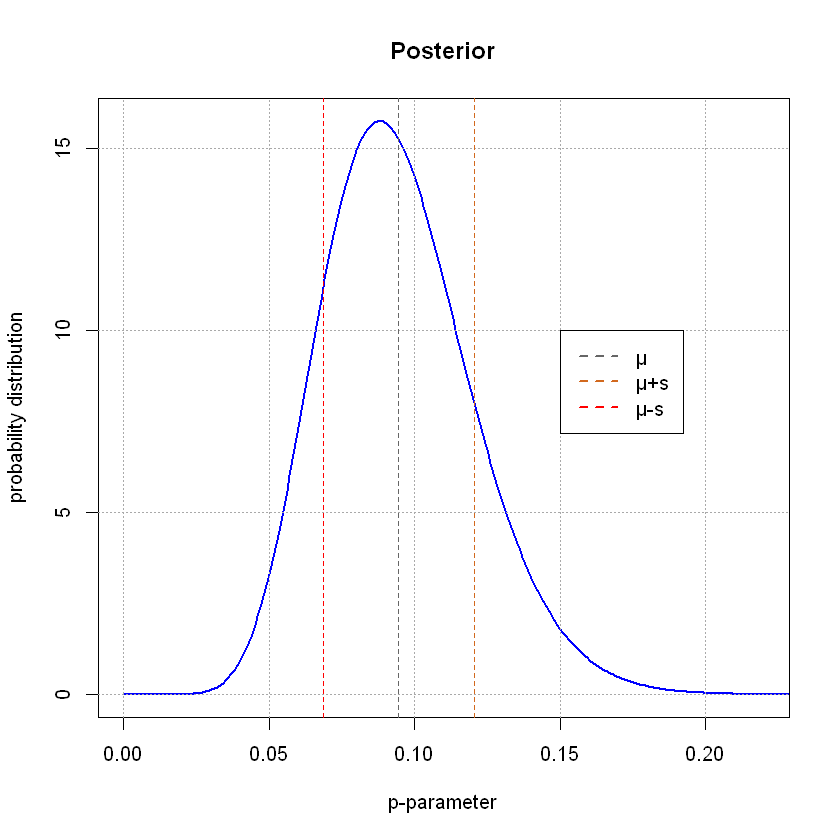

In [9]:
p<-seq(0,1,length=1e3)
interval_width<-1/(length(p)-1)

alpha_prior<-1
beta_prior<-10

prior<-dbeta(x=p,alpha_prior,beta_prior)

alpha_posterior<-alpha_prior+y
beta_posterior<-beta_prior+n-y

posterior<-dbeta(x=p,alpha_posterior,beta_posterior)

lower_bound<-qbeta(0.025,alpha_posterior,beta_posterior)

upper_bound<-qbeta(0.975,alpha_posterior,beta_posterior)

mean_posterior<-mean_var(alpha_posterior,beta_posterior)[1]

var_posterior<-mean_var(alpha_posterior,beta_posterior)[2]

plot(x,posterior/sum(posterior*interval_width),col="blue",xlim=c(0,0.22),type="l",lwd=2,
    ylab="probability distribution",xlab="p-parameter",main="Posterior")
grid(nx = NULL, ny = NULL, col = "darkgray", lty = "dotted")
abline(v=mean_posterior, col="gray40", lty=2)
abline(v=mean_posterior+sqrt(var_posterior), col="chocolate", lty=2)
abline(v=mean_posterior-sqrt(var_posterior), col="red", lty=2)
legend(0.15,10, c("µ", "µ+s", "µ-s"), 
       col=c("gray40","chocolate","red"), 
       lty= c("dashed","dashed","dashed"),
       lwd = c(2,2,2) )

cat("The mean value and best bayesian estimator is",mean_posterior,"\n")
cat("The variance posterior is",var_posterior,"\n")
cat("Lower bound is",lower_bound,"upper_bound",upper_bound)


### (d) test the hypotesis Ho : p = 0.1 versus H1 : p  $\neq$ 0.1 
### at 5% level of significance with both the frequentist and bayesian approach

In [10]:
#frequentist
f_test<-binom.test(x=y, n=n, p = 0.10,
           alternative = "two.sided",  #alternative hypothesis 
           conf.level = 0.95)

if(f_test$p.value<0.05){
    cat("Hypothesis test can be rejected")}else{
    cat("Hypothesis test cannot be rejected")}


Hypothesis test cannot be rejected

In [11]:
#bayesian
if(lower_bound<0.1 & 0.1<upper_bound){cat("Hypothesis test cannot be rejected")}else{cat("Hypothesis test can be rejected")}

Hypothesis test cannot be rejected

### - a new measurement, performed one month later on n = 165 water samples, gives y = 9 high bacter X level

### (e) find the frequentist estimator for p

In [12]:
y<-9
n<-165
p<-y/n
cat("The frequentist estimator p will be simple mean",p)

The frequentist estimator p will be simple mean 0.05454545

### (f) find a bayesian estimator for p, assuming both a Beta(1; 10) prior for p, and assuming the posterior probability of the older measurement as the prior for the new one.

### (g) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

In [13]:
p<-seq(0,1,length=1e3)
interval_width<-1/(length(p)-1)

new_alpha_posterior_from_prior<-alpha_prior+y
new_beta_posterior_from_prior<-beta_prior+n-y

new_posterior_from_prior<-dbeta(x=p,new_alpha_posterior_from_prior,new_beta_posterior_from_prior)

mean_post_from_prior<-mean_var(new_alpha_posterior_from_prior,new_beta_posterior_from_prior)[1]

var_post_from_prior<-mean_var(new_alpha_posterior_from_prior,new_beta_posterior_from_prior)[2]

cat("Starting from prior Beta(1,10):\n")
cat("the mean is",mean_post_from_prior,"\n")
cat("The variance is",var_post_from_prior,"\n")

lower_bound_from_prior<-qbeta(0.025,new_alpha_posterior_from_prior,new_beta_posterior_from_prior)

upper_bound_from_prior<-qbeta(0.975,new_alpha_posterior_from_prior,new_beta_posterior_from_prior)

cat("Lower bound",lower_bound_from_prior,"and upper bound",upper_bound_from_prior,"\n")

new_alpha_posterior_from_posterior<-alpha_posterior+y
new_beta_posterior_from_posterior<-beta_posterior+n-y

new_posterior_from_posterior<-dbeta(x=p,new_alpha_posterior_from_posterior,new_beta_posterior_from_posterior)

mean_post_from_post<-mean_var(new_alpha_posterior_from_posterior,new_beta_posterior_from_posterior)[1]

var_post_from_post<-mean_var(new_alpha_posterior_from_posterior,new_beta_posterior_from_posterior)[2]

cat("Starting from posterior Beta(",alpha_posterior,",",beta_posterior,"):\n")
cat("The mean is",mean_post_from_post,"\n")
cat("The variance is",var_post_from_post,"\n")

lower_bound_from_posterior<-qbeta(0.025,new_alpha_posterior_from_posterior,new_beta_posterior_from_posterior)

upper_bound_from_posterior<-qbeta(0.975,new_alpha_posterior_from_posterior,new_beta_posterior_from_posterior)

cat("Lower bound",lower_bound_from_posterior,"and upper bound",upper_bound_from_posterior)

Starting from prior Beta(1,10):
the mean is 0.05681818 
The variance is 0.0003027677 
Lower bound 0.02773918 and upper bound 0.09538012 
Starting from posterior Beta( 12 , 115 ):
The mean is 0.07191781 
The variance is 0.0002278008 
Lower bound 0.04522356 and upper bound 0.1041519

### (h) test the hypotesis  Ho : p = 0.1 versus H1 : p$\neq$0.1 at 5% level of significance with both the frequentist and bayesian approach

In [14]:
#frequentist
f_test<-binom.test(x=y, n=n, p = 0.10,
           alternative = "two.sided",  #alternative hypothesis 
           conf.level = 0.95)

if(f_test$p.value<0.05){
    cat("Hypothesis test can be rejected")}else{
    cat("Hypothesis test cannot be rejected")}

Hypothesis test cannot be rejected

In [15]:
#bayesian
if(lower_bound_from_posterior<0.1 & 0.1<upper_bound_from_posterior){cat("Hypothesis test cannot be rejected")}else{cat("Hypothesis test can be rejected")}

Hypothesis test cannot be rejected

In [16]:
f<-function(a){
    v<-seq(1,a,length=79)

pari<-c()
for(i in v){
    
    if (i%%2==0){
     
     pari<-c(pari,i)
   }
}

    return(pari)
    }

In [17]:
args(f)

function (a) 
NULL

In [18]:
is.integer(3/2)

[1] FALSE